In [13]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import os
from pathlib import Path
import itertools
import string
import numpy as np

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Function for plotting

In [ ]:
def plot_results_percentage(feature:str, optimization_data:pd.DataFrame, output_filename:str=None):
    """Plots the effect of the hyperparameters on the percentage of outliers detected

    Args:
        feature (str): feature to plot
        optimization_data (pd.DataFrame): the data which should be plotted
        output_filename (str, optional): filename, if the plot should be saved. Defaults to None.
    """
    result = optimization_data.groupby([feature]).mean().reset_index()
    alphabet = list(string.ascii_uppercase)
    if "Total" in optimization_data.columns:
        alphabet.append("Total")
    fig = plt.figure(figsize=(20, 10))

    for letter in alphabet:
        if letter == "Total":
            plt.plot(result[feature], result[letter],
                     "b-", label=letter, linewidth=3)
        else:
            plt.plot(result[feature], result[letter],
                     ":", label=letter, linewidth=1)
        plt.title(letter)

    plt.xlabel(feature)
    plt.ylabel("Percentage of outliers")
    plt.title(f"Effect of {feature}")
    plt.legend()
    plt.grid(color='#DDDDDD', linestyle=':', linewidth=0.5)
    if output_filename is not None:
        plt.savefig(output_filename)
    plt.show()

### Reading the data

In [2]:
# lists for later
results_columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]
alphabet = list(string.ascii_uppercase)
percentages_columns = alphabet + ["Total"]

# dataframe for evaluation
results = pd.DataFrame(columns=results_columns )
results["Model"] = ["Isolation Forest", "Local Outlier Probability", "DB Scan", "Own Algorithm"]

# dataframe for percentages
perc_columns = ["Letter", "Isolation Forest", "Local Outlier Probability", "DB Scan", "Own Algorithm"]
percentages = pd.DataFrame(columns=perc_columns) 

In [23]:
path_iso_for = Path("Data/Output_Data/02_Results_Ifor/Ifor_rel.csv").absolute()
path_db_scan = Path("Data/Output_Data/03_DBScan/result_DBSCAN_per_3std_4,16%.csv")
path_lop = Path("Data/Output_Data/04_Local_outlier_prob/results_lop_per_3std_4,16%_06_07.csv")
path_own_algo = Path("Data/Output_Data/05_Own_algorithm/results_per_own_algo_hyper_para_3std_4_16%.csv")

path_iso_val = Path("Data/Output_Data/02_Results_Ifor/Ifor_val.csv").absolute()

iso_for = pd.read_csv(path_iso_for)
db_scan = pd.read_csv(path_db_scan)
lop = pd.read_csv(path_lop)
own_algo = pd.read_csv(path_own_algo)

solution = pd.read_csv("Data/Output_Data/solution_3std_4.16%.csv")
solution.columns = ["Letter", "Solution"]


In [21]:
# renaming for having the same column names for all dataframes

db_scan.columns = ['Unnamed: 0', '_', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', 'Total', 'f1', 'accuracy', 'precision', 'recall']
own_algo.columns = ['Unnamed: 0', 'IQR', 't', 'a', 'Count', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', 'Total', 'f1', 'accuracy', 'precision',
       'recall']
lop.columns = ['Unnamed: 0', 'e', 'n', '%', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
       'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'Total', 'accuracy', 'f1', 'precision', 'recall']

### Watch effect of hyperparameters

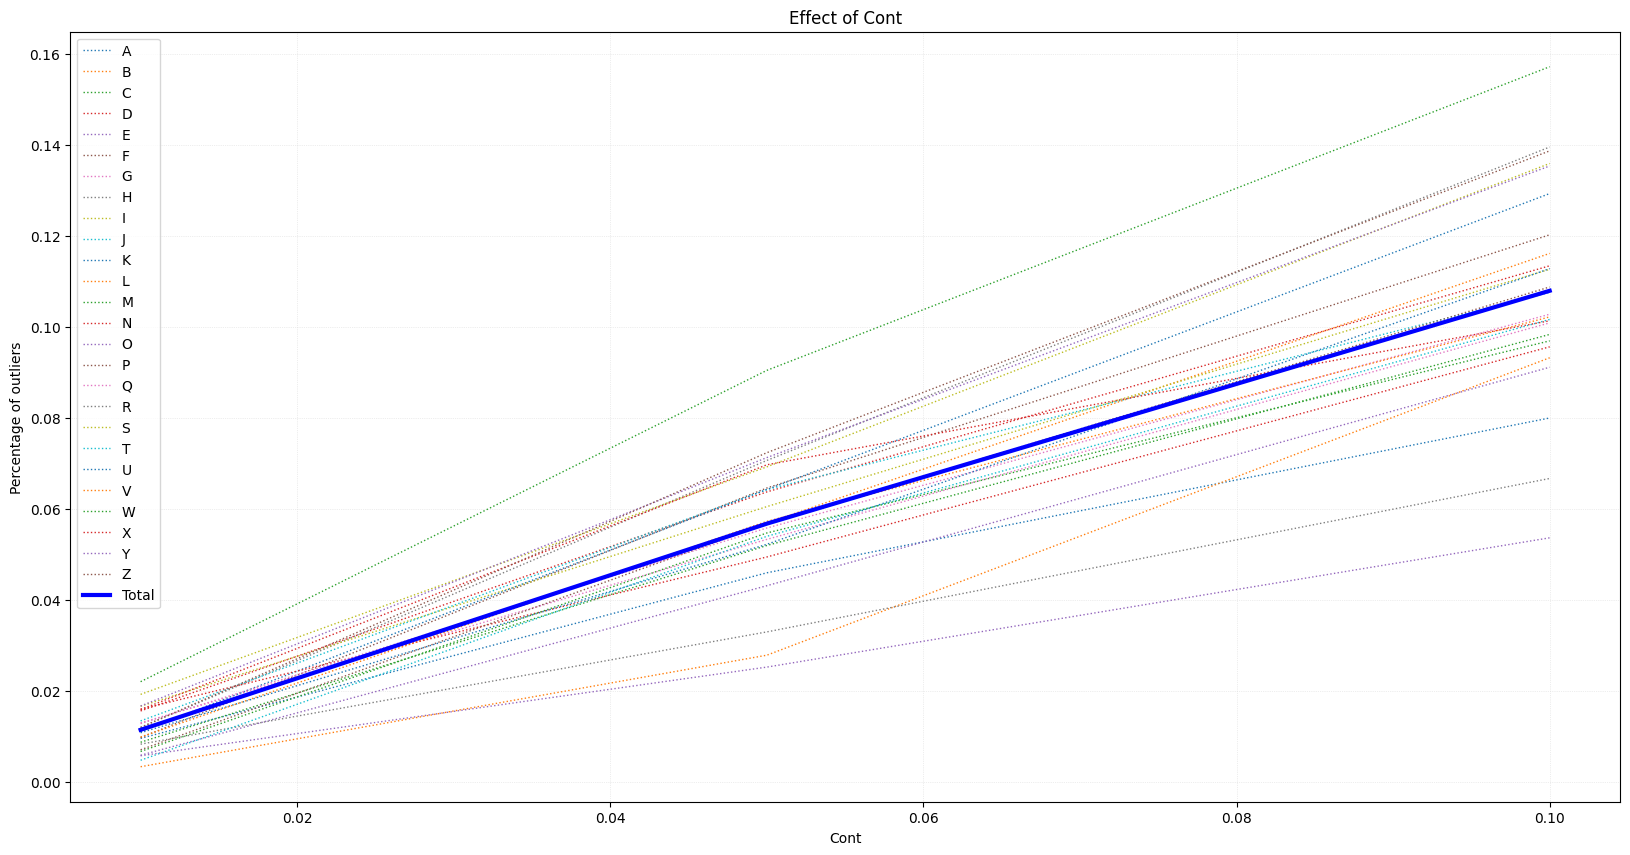

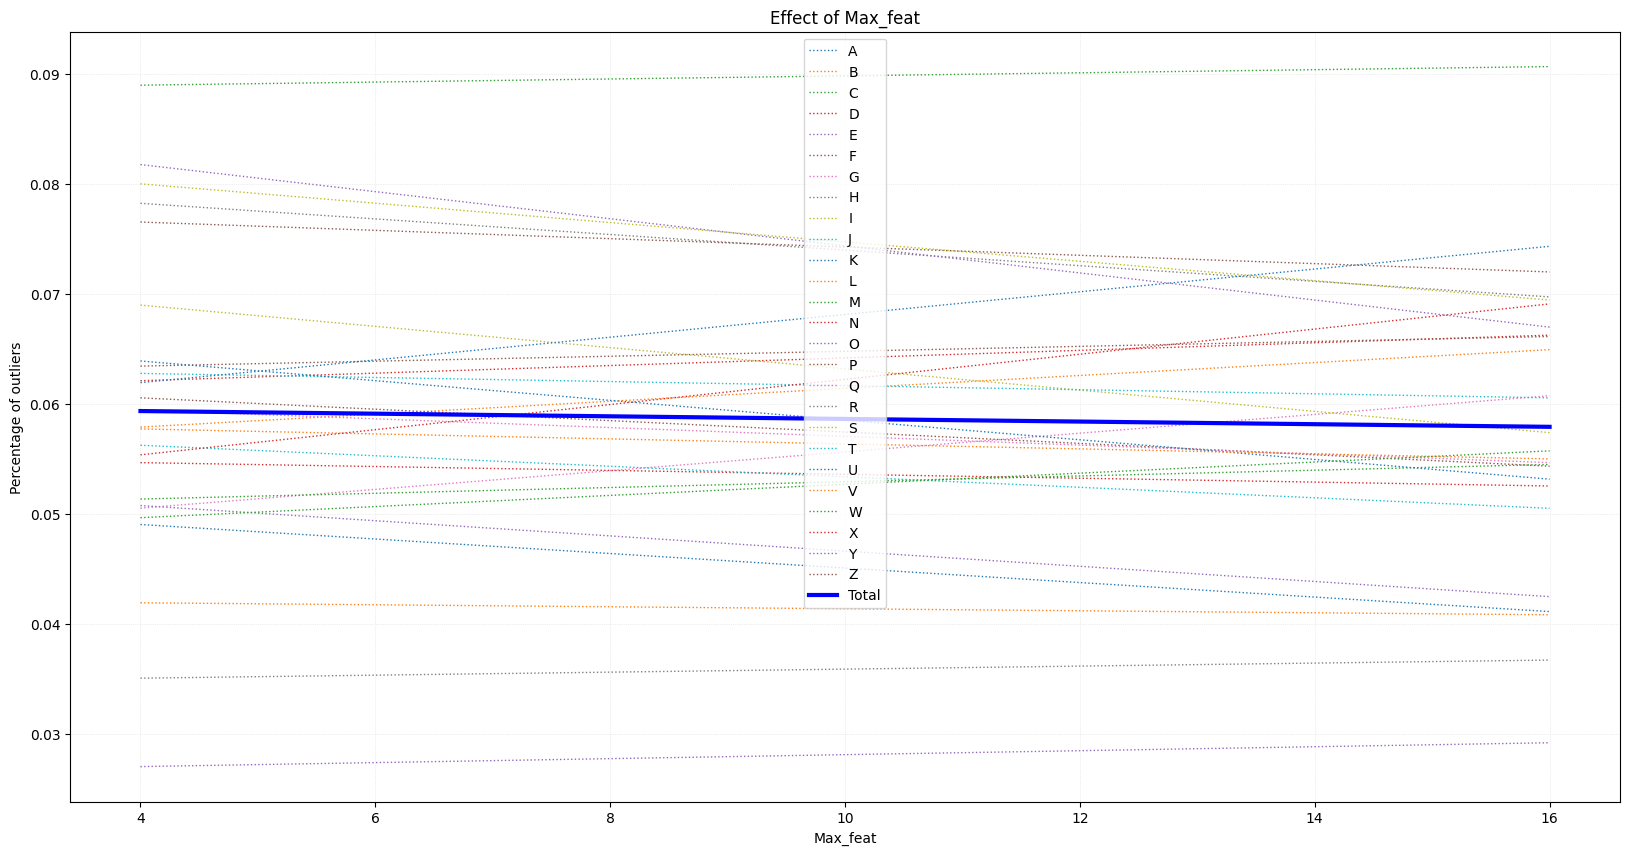

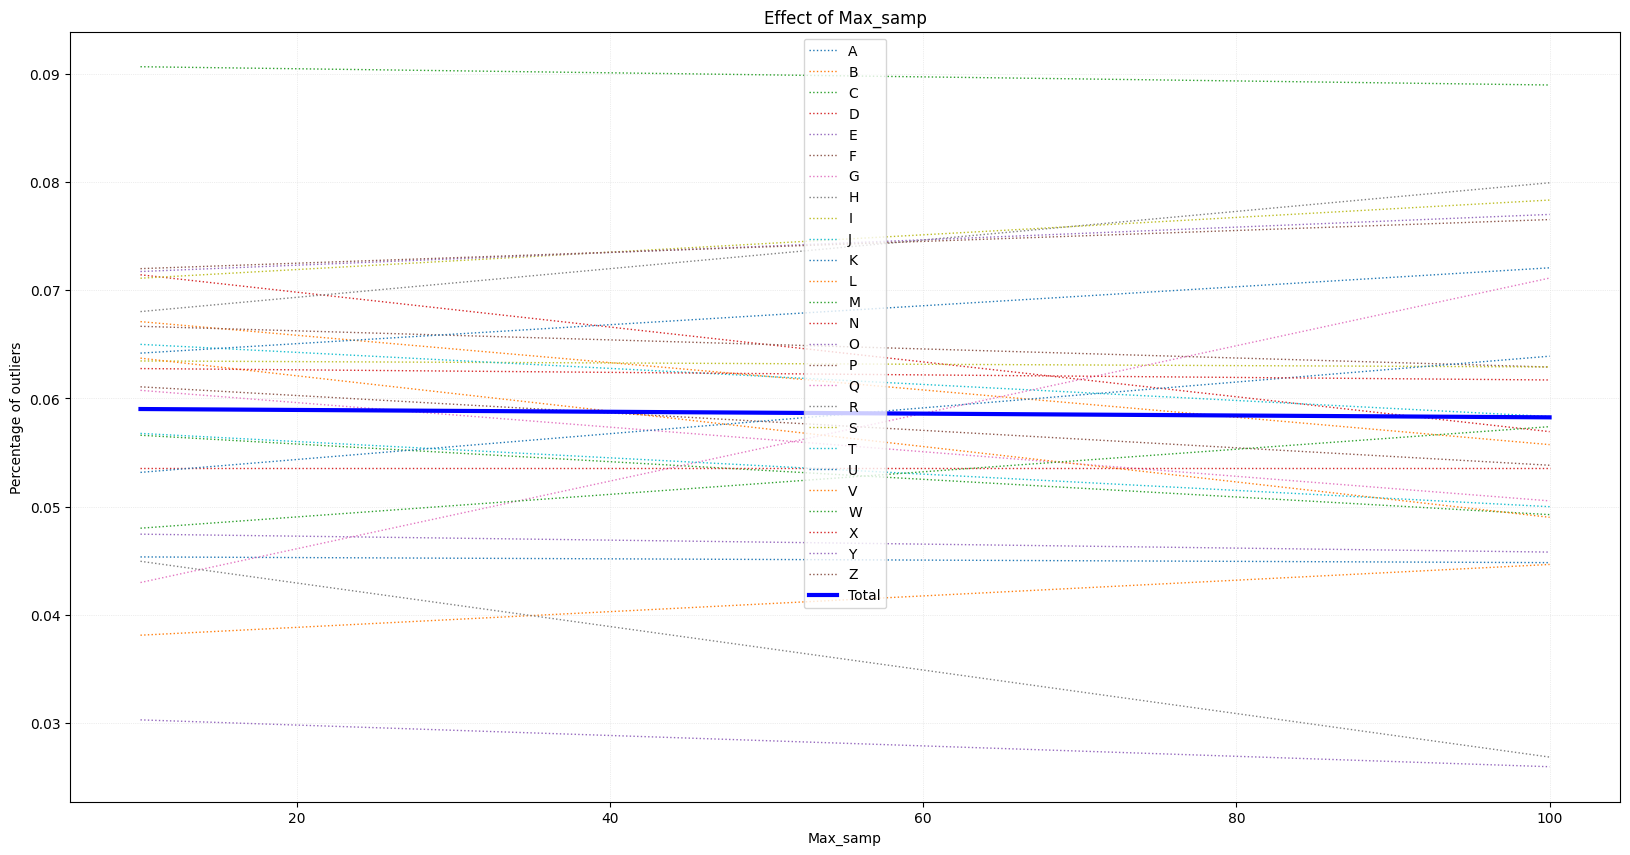

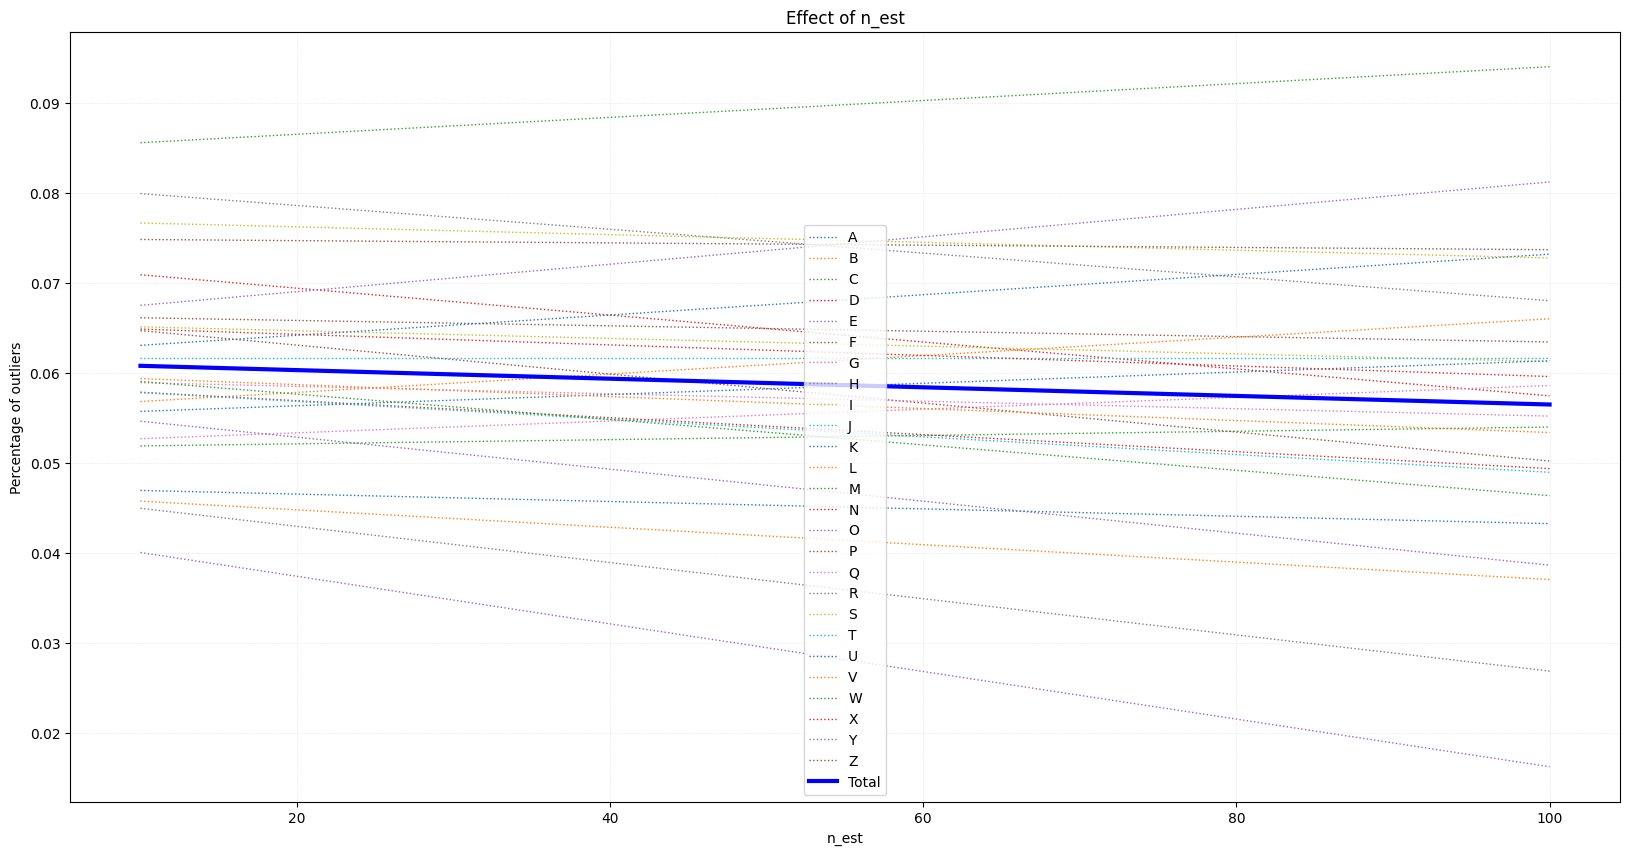

In [14]:
# effect of hyperparameters of Isolation Forest on percentages
for parameter in list(iso_for.columns)[1:5]:
    plot_results_percentage(parameter, iso_for)

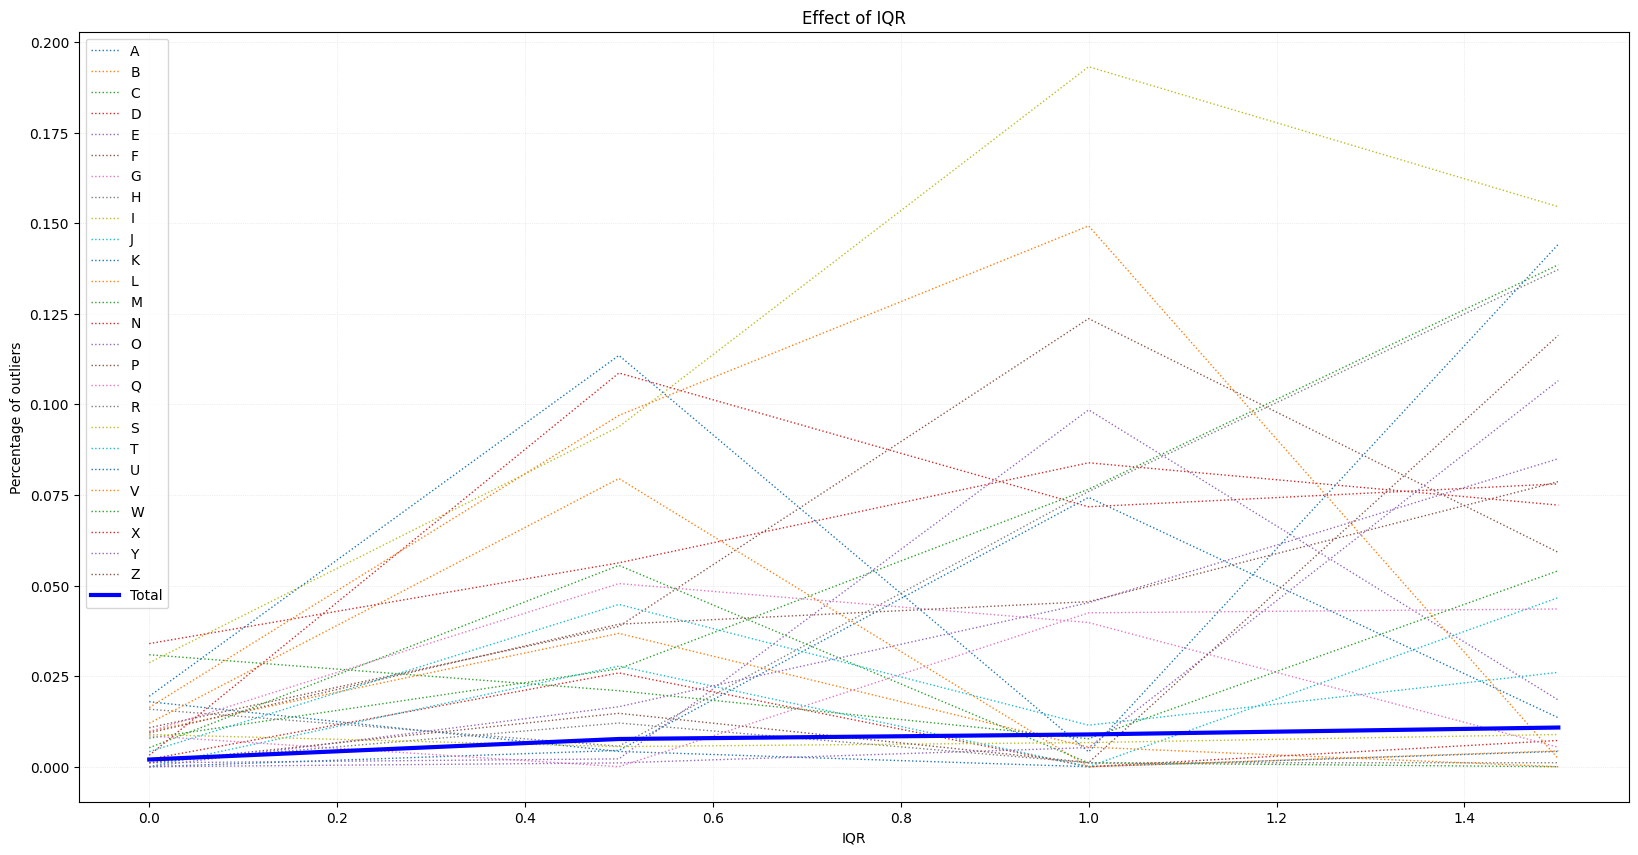

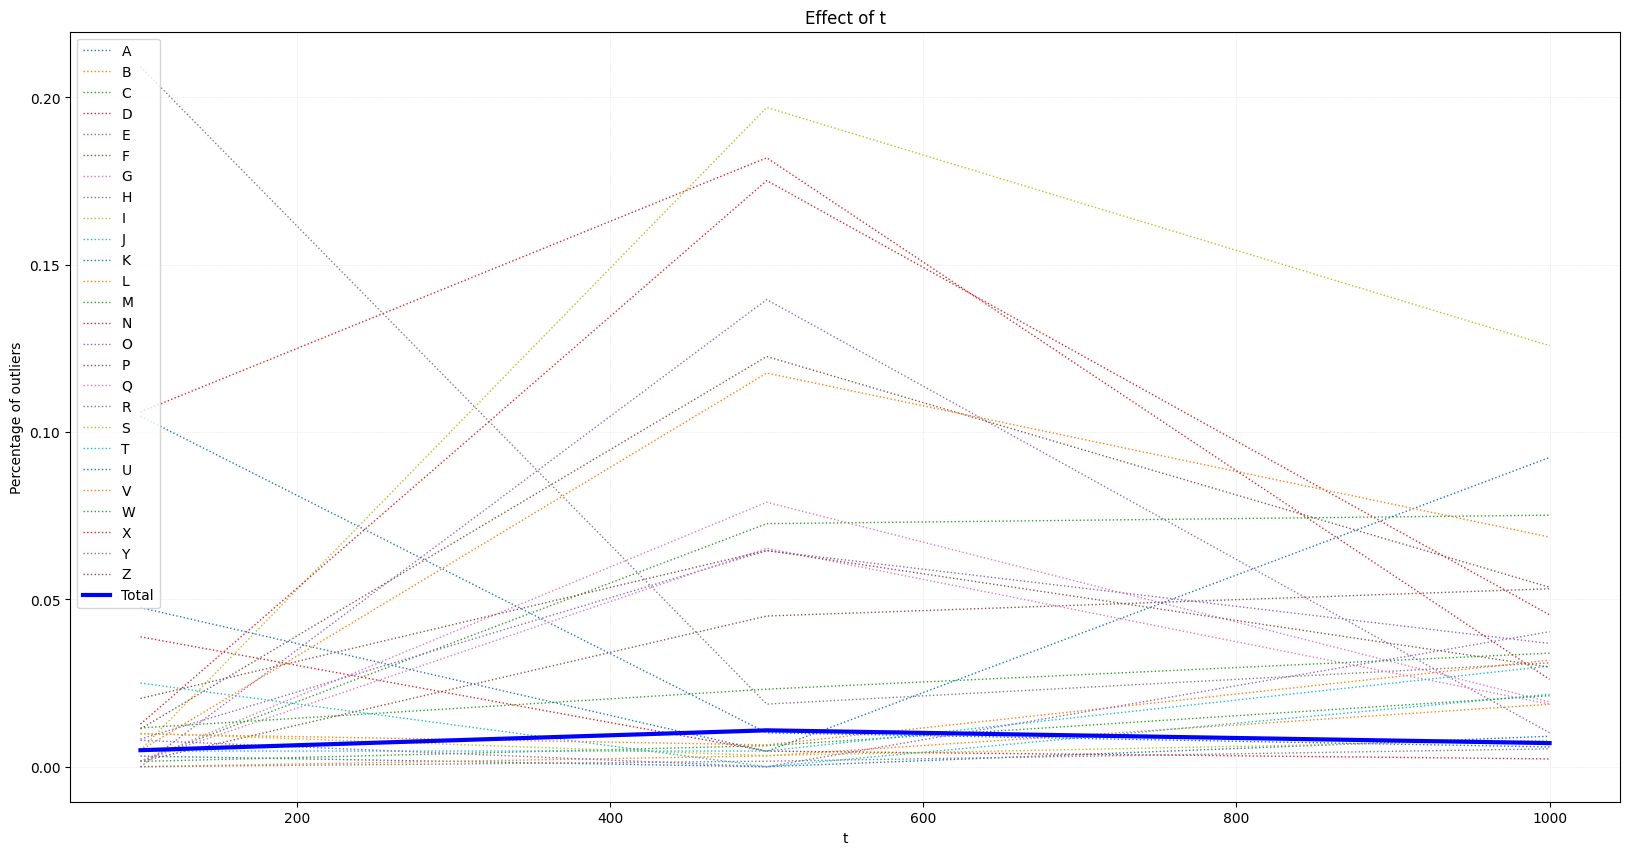

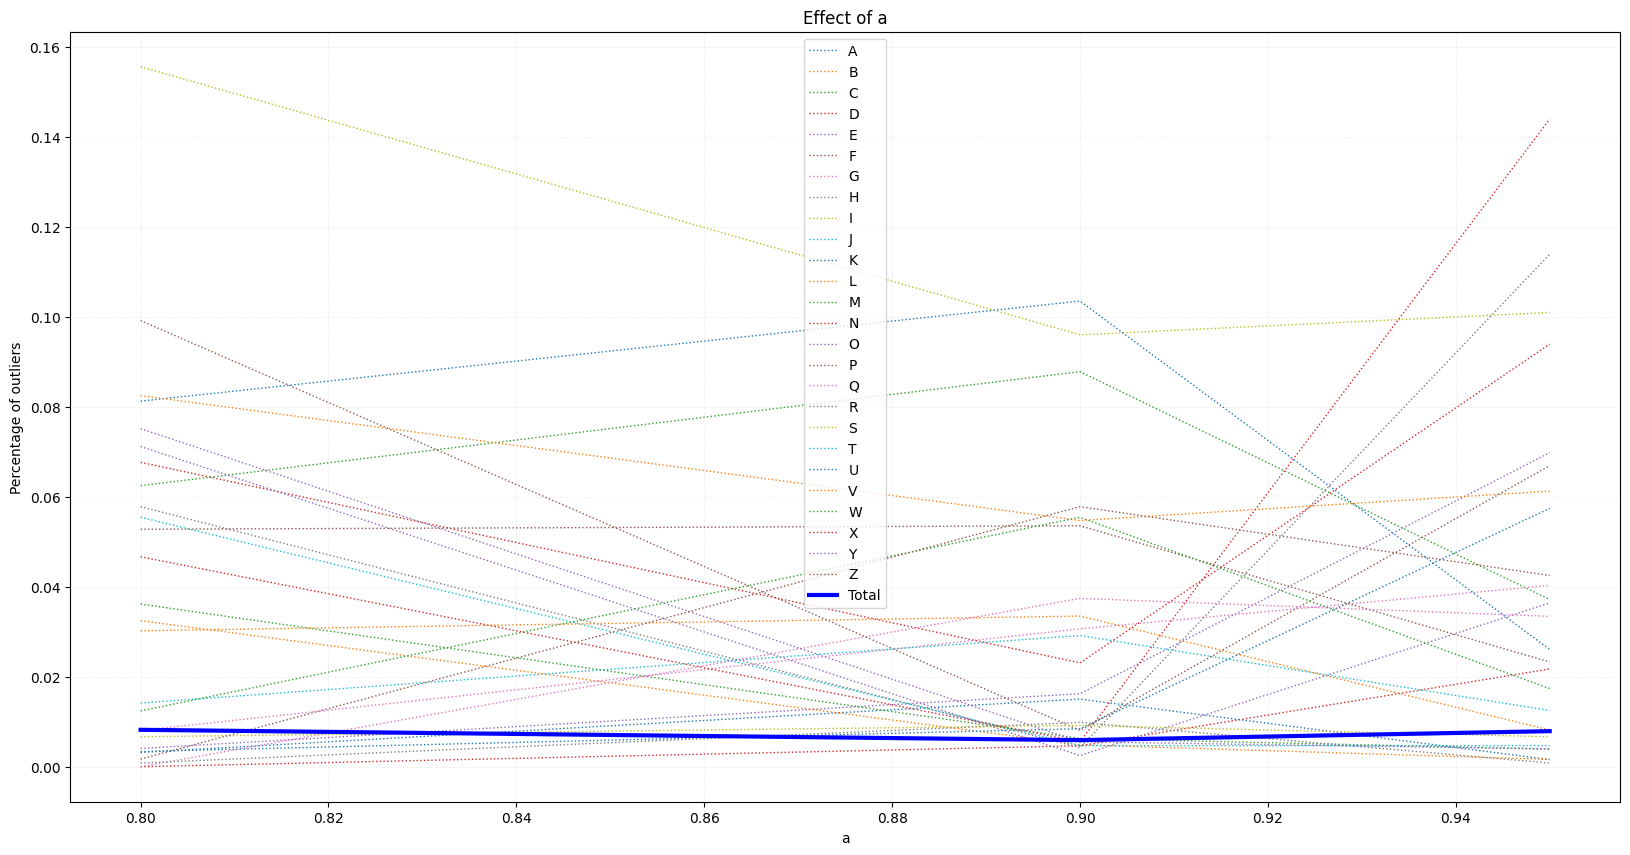

In [22]:
# effect of hyperparameters of Own Algo on percentages
for parameter in list(own_algo.columns)[1:4]:
    plot_results_percentage(parameter, own_algo)

### Find the best results

In [7]:
results.loc[results["Model"]=="Isolation Forest", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(iso_for.loc[iso_for["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Isolation Forest"] = list(iso_for.loc[iso_for["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="DB Scan", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(db_scan.loc[db_scan["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["DB Scan"] = list(db_scan.loc[db_scan["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="Local Outlier Probability", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(lop.loc[lop["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Local Outlier Probability"] = list(lop.loc[lop["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="Own Algorithm", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(own_algo.loc[own_algo["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Own Algorithm"] = list(own_algo.loc[lop["f1"].idxmax(), percentages_columns])
percentages["Letter"] = alphabet + ["Total"]
print(results.head())
print(percentages.head())

                       Model  Accuracy Precision    Recall        F1
0           Isolation Forest   0.86562  0.058275   0.15625   0.08489
1  Local Outlier Probability    0.9801  0.747153  0.788462  0.767251
2                    DB Scan   0.86765  0.192685  0.683894  0.300661
3              Own Algorithm  0.889304  0.077381    0.1625  0.104839
  Letter  Isolation Forest  Local Outlier Probability   DB Scan  Own Algorithm
0      A          0.069620                   0.049430  0.150824       0.012658
1      B          0.077922                   0.037859  0.168407       0.000000
2      C          0.202703                   0.047554  0.043478       0.006757
3      D          0.111801                   0.053416  0.175155       0.000000
4      E          0.058442                   0.040365  0.018229       0.000000


In [8]:
results

,Model,Accuracy,Precision,Recall,F1
0,Isolation Forest,0.86562,0.058275,0.15625,0.08489
1,Local Outlier Probability,0.9801,0.747153,0.788462,0.767251
2,DB Scan,0.86765,0.192685,0.683894,0.300661
3,Own Algorithm,0.889304,0.077381,0.1625,0.104839


### Plot the results

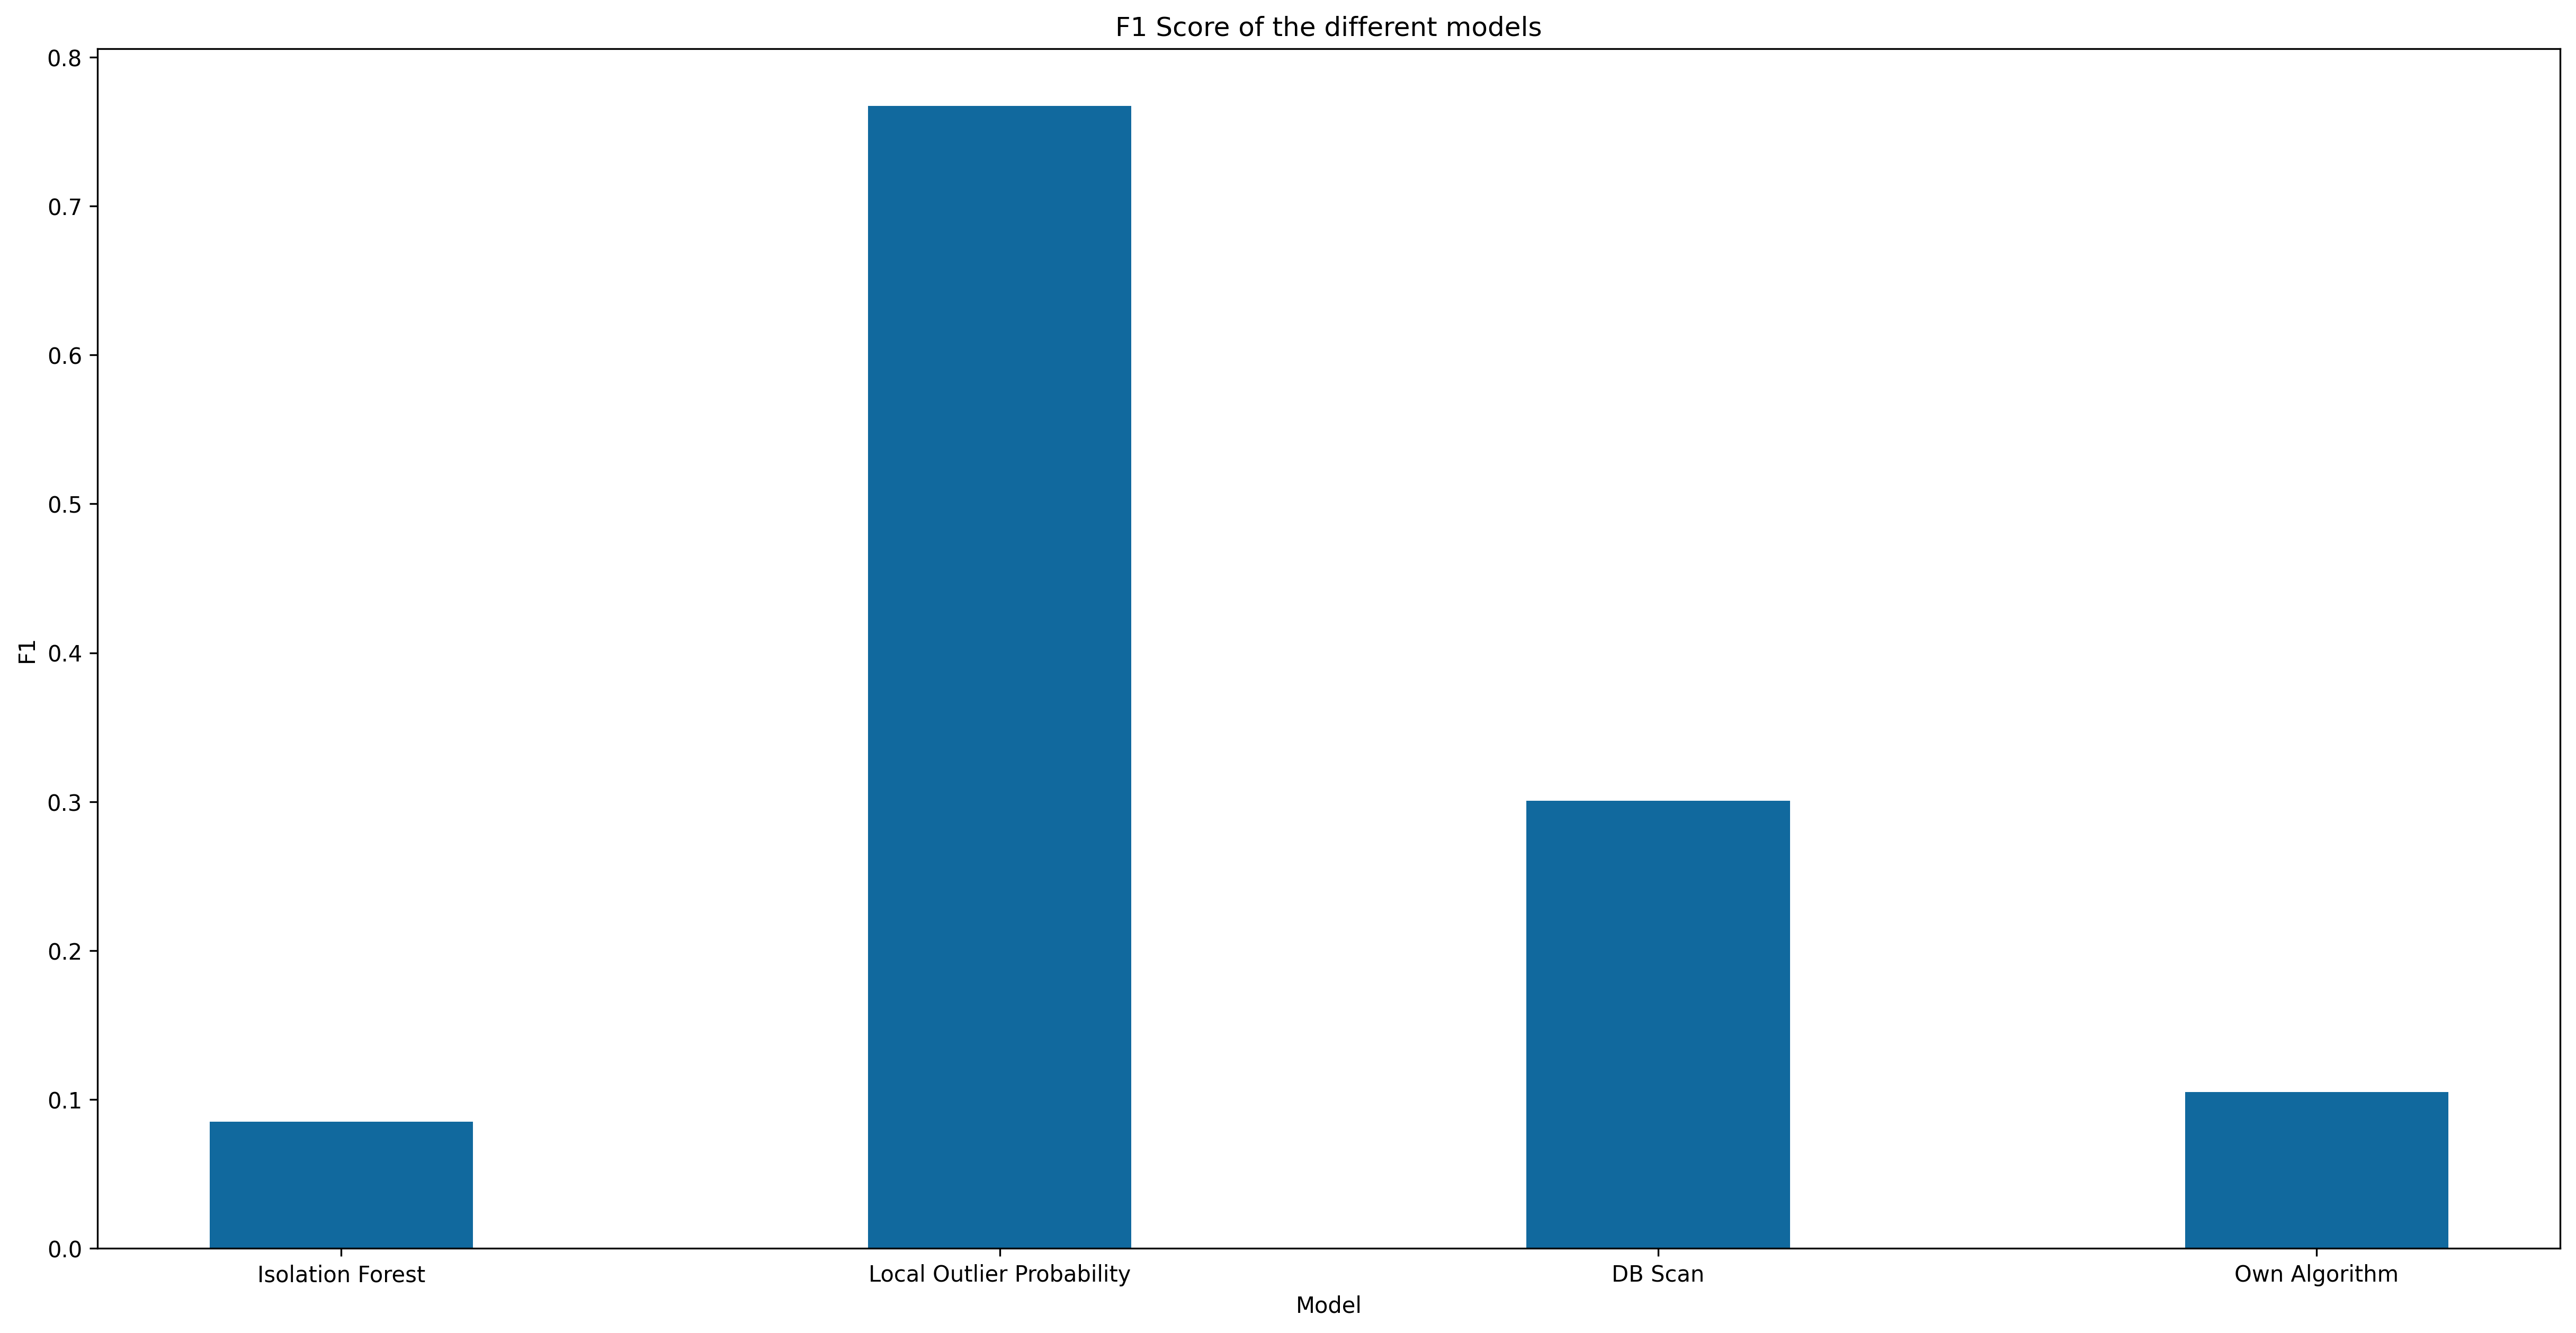

In [9]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize = (20, 10))
 
measure = "F1"

# creating the bar plot
plt.bar(results["Model"], results[measure], color ='#11699E',width = 0.4)
 
plt.xlabel("Model")
plt.ylabel(measure)
plt.title("F1 Score of the different models")
plt.show()
x = ["#11699E", "#F60045", "#B2B2B2", "#D9D9D9"]

### Plot the percentages per letter and model

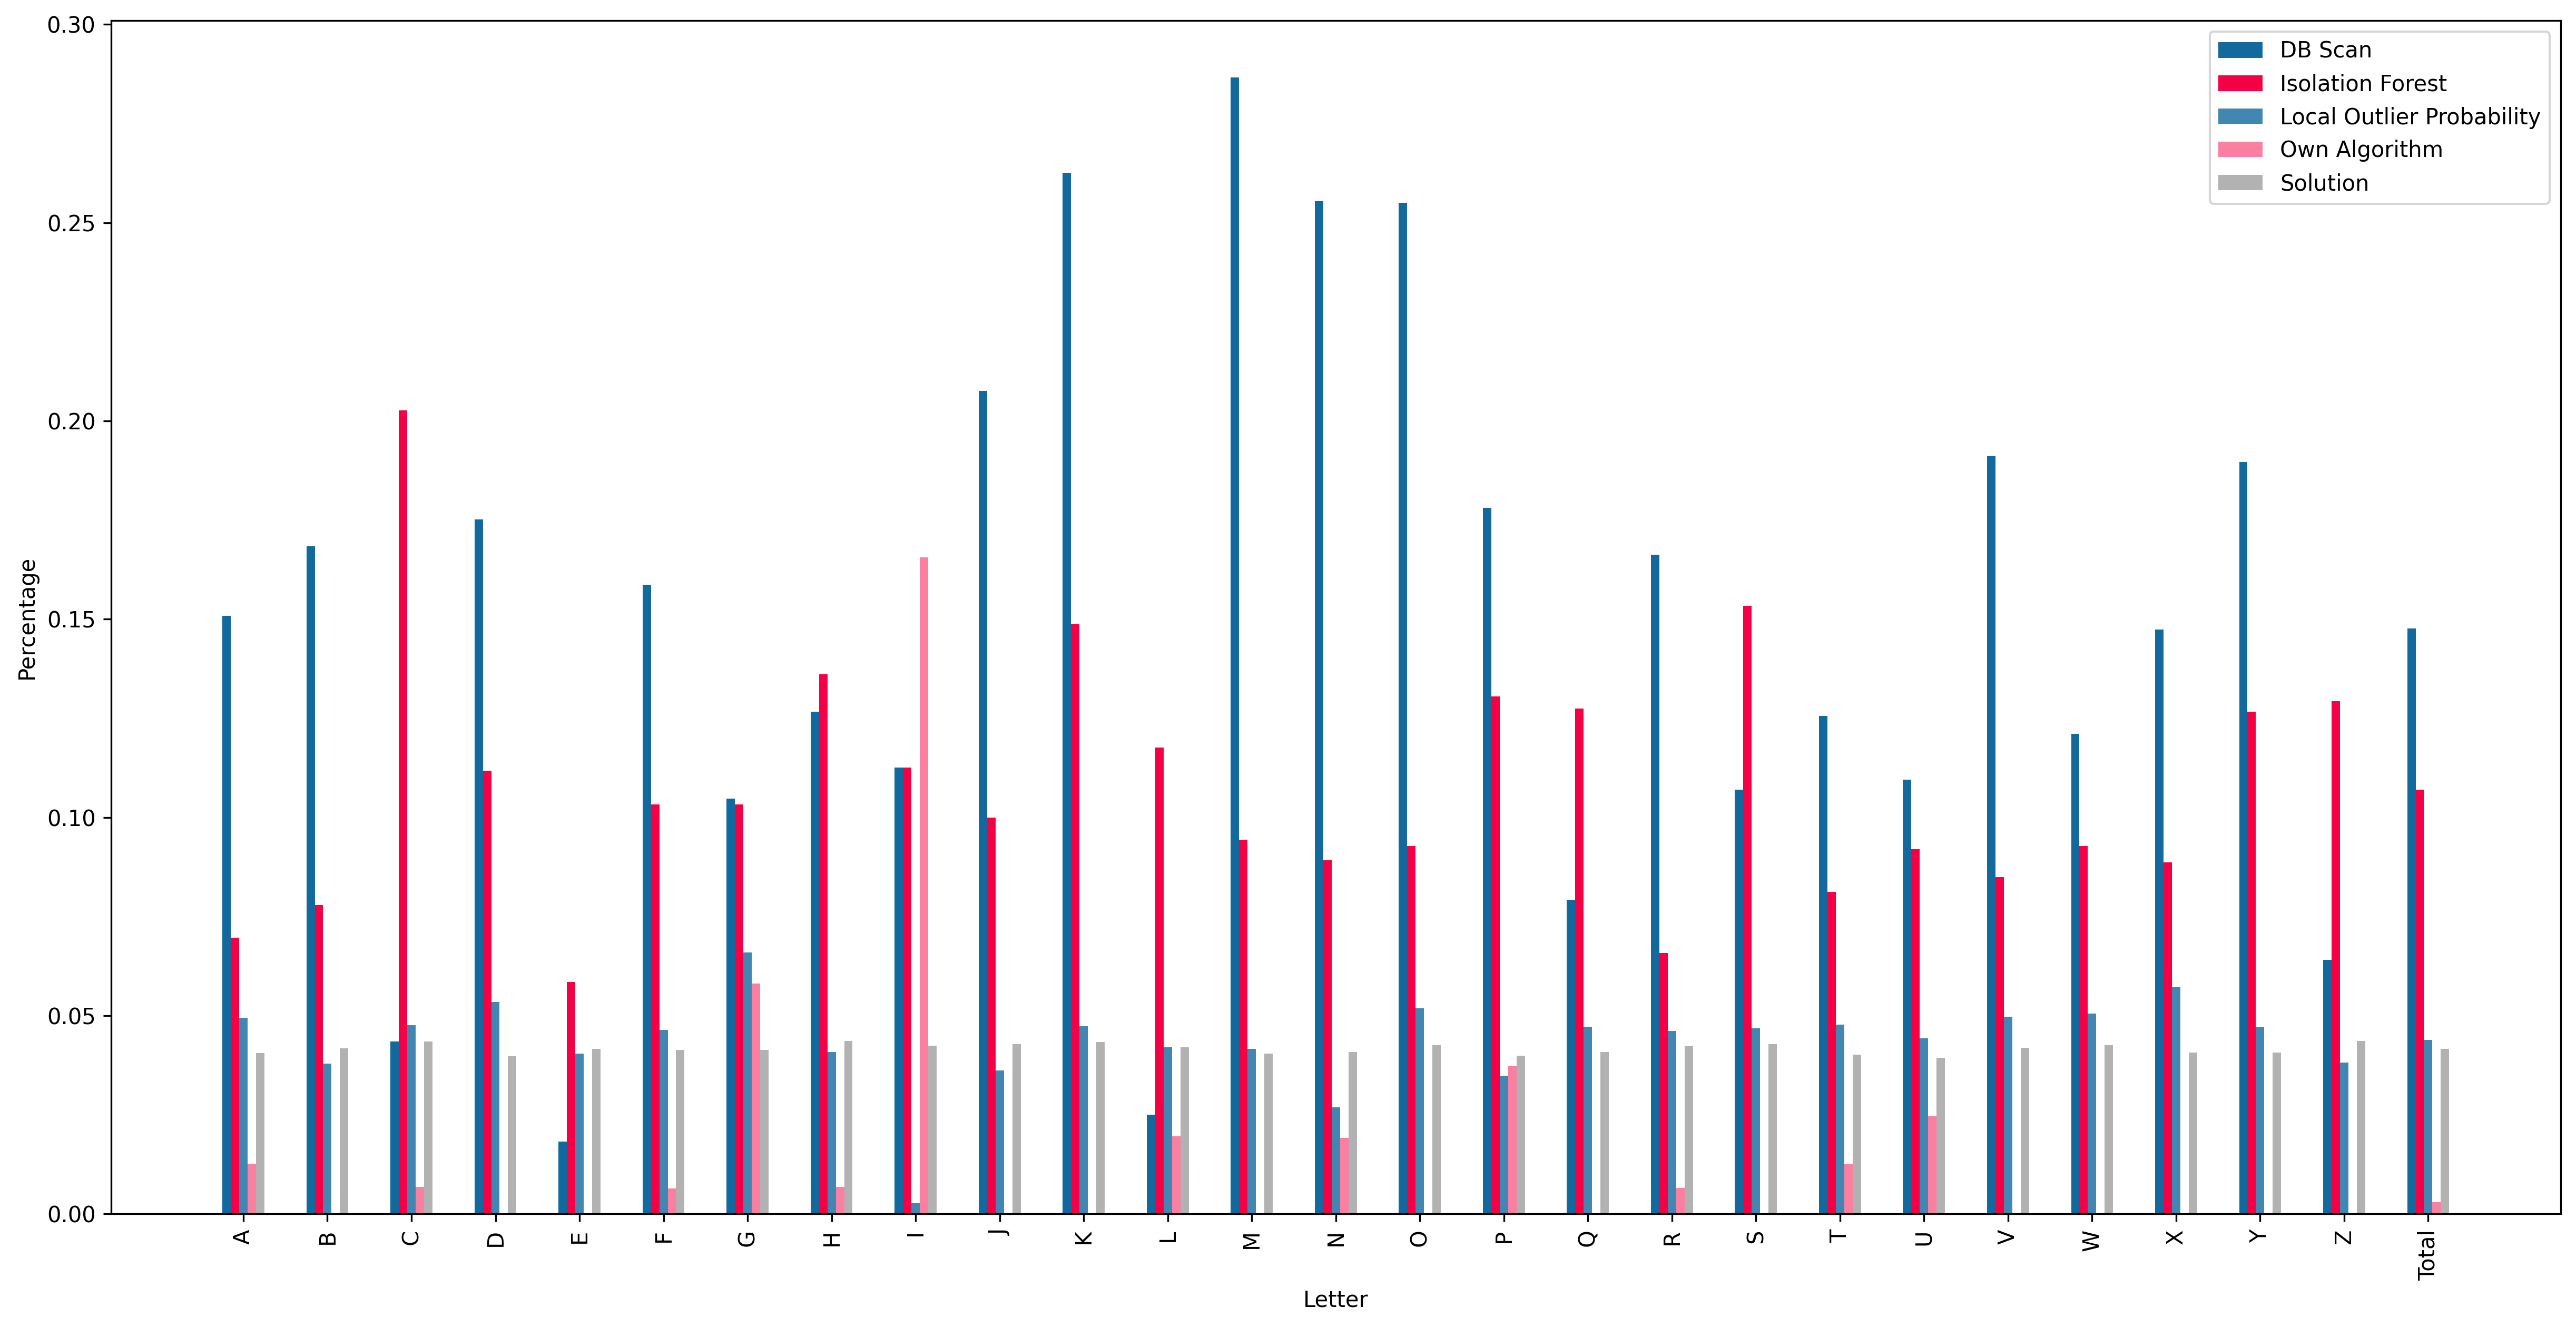

In [13]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(20,10))

plt.bar(np.arange(len(percentages)) - 0.2, height=percentages['DB Scan'], width=0.1, label='DB Scan', color='#11699E')
plt.bar(np.arange(len(percentages)) - 0.1, height=percentages['Isolation Forest'], width=0.1, label='Isolation Forest', color='#F60045')
plt.bar(np.arange(len(percentages)) , height=percentages['Local Outlier Probability'], width=0.1, label='Local Outlier Probability', color='#11699E', alpha=0.8)
plt.bar(np.arange(len(percentages)) + 0.1, height=percentages['Own Algorithm'], width=0.1, label='Own Algorithm', color='#F60045', alpha=0.5)
plt.bar(np.arange(len(solution)) + 0.2, height=solution['Solution'], width=0.1, label='Solution', color='#B2B2B2')
plt.xticks(range(0,27), labels=percentages['Letter'], rotation=90)
plt.xlabel("Letter")
plt.ylabel("Percentage")
plt.legend()
plt.show(fig)